In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import plotly.io as pio
pio.templates.default = 'simple_white'
pio.orca.config.executable = '/Users/ngsk/.conda/envs/ds/bin/orca'

68.82800262074943
[52 58 64 68 73 79 86]
[86 52 58 73 68 79 64]


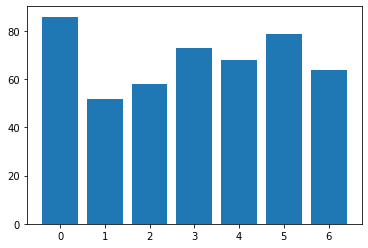

In [115]:

rng = np.random.default_rng()
u = np.random.normal() * 20 + 50 
print(u)

src = np.random.normal(loc=u, scale=15, size=1000)

x = np.arange(7)
y = np.percentile(src, [12.5, 25.0, 37.5, 50, 62.5, 75, 87.5]).astype(np.int)
print(y)
y = rng.permutation(y)

plt.bar(x,y)

print(y)


In [125]:
# Making Study Data
#
col = ['item1','item2','item3','item4','item5','item6','item7','max','max_index','graphFlag','size','deviation','img']
df = pd.DataFrame(index=[], columns=col)

#
maxsize = 7

size = 7
repeat = range(1,6)

graphFlag = True

a = 0.5
b = - 3.5

rng = np.random.default_rng()

for size in [3,5,7]:
    for deviation in [5,15]:
        for rep in repeat:
            u = np.random.randint(80)
            x = np.arange(1, size+1)
            # y = np.abs(np.random.normal(loc=u, scale=5, size=(size*10))).astype(np.int)
            # y = np.unique(y) + 10
            # y = np.random.choice(list(y), size=size, replace=False)
            u = np.random.normal() * 20 + 50 
            src = np.random.normal(loc=u, scale=deviation, size=1000)

            p = [12.5, 25.0, 37.5, 50, 62.5, 75, 87.5]
            if size == 5:
                p = [16.7, 33.3, 50, 66.7, 83.3]
            if size == 3:
                p = [25, 50, 75]

            y = np.percentile(src, p).astype(np.int)
            if np.min(y) < 0:
                y += -np.min(y) + 1

            if np.max(y) > 100:
                y -= np.max(y)-99

            y = rng.permutation(y)

            y_stack = y

            for graphFlag in [True, False]:

                y = y_stack

                fig = go.Figure()

                fig.add_trace(go.Bar(
                    x=x,
                    y=y * graphFlag))

                if (graphFlag is not True):
                    for idx, xvalue in np.ndenumerate(x):    
                        fig.add_annotation(
                            text=y[idx].astype(np.str),
                            x=xvalue,
                            y=45,
                            showarrow=False,
                            font_color='#000000',
                            font_size=40
                        )
                
                fig.update_layout(
                    width=600,
                    height=400,
                    margin=dict(l=10, r=10, b=10, t=10, pad=0)
                    )

                offset = a * size + b

                fig.update_xaxes(
                    visible=False,
                    autorange=False,
                    range=(offset+0.5,offset+7.5),
                )
                fig.update_yaxes(
                    visible=False,
                    range=(0,100)
                )
                #fig.show()

                prefix = 'graph' if graphFlag else 'number'
                d_label = 'ld' if deviation == 15 else 'sd'
                fname = '{0}-{1}-{2}-{3}.png'.format(prefix, size, d_label, rep)
                fig.write_image(fname)

                # csv
                # col = ['item1','item2','item3','item4','item5','item6','item7','max','max_index','graphFlag','size','deviation','img']
                y = np.pad(y, [0, maxsize-size], 'constant') 
                y = np.append(y, np.array([np.max(y), np.argmax(y)+1, graphFlag, size]))
                y = np.append(y, deviation)
                y = np.append(y, fname)
                
                ser = pd.Series(y, index=df.columns)
                df = df.append(ser, ignore_index=True)

# save
df.to_csv('study_data.csv', index=False)
print('Done.')


Done.


In [36]:
# Analyze
df = pd.read_csv('study--2020-11-22--16_10_23.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'study--2020-11-22--16_10_23.csv'

In [37]:
df_number = df[df['sender'] == 'Stimulus Number']
df_number

KeyError: 'sender'

In [ ]:
df_number['duration'].mean()

In [ ]:
df_number['duration'].median()

In [ ]:
correct = df_number['correct'].sum() / df_number['correct'].count()
print('正答率 {0}'.format(correct))

In [ ]:
df_graph = df[df['sender'] == 'Stimulus Graph']
df_graph

In [ ]:
df_graph['duration'].mean()

In [ ]:
df_graph['duration'].median()

In [ ]:
correct = df_graph['correct'].sum() / df_graph['correct'].count()
print('正答率 {0}'.format(correct))

In [ ]:
df_number.describe()

In [ ]:
df_graph.describe()